## Heart Disease Prediction

`Author` : [Khubaib Ahsan](https://www.kaggle.com/khubaibahsanmustafa)\
`Dataset url`: [Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?resource=download)


### About Dataset
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
   -- `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute

### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." Web Link
Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.
#### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.


## Import Libraries

In [2]:
# import Libraries

# To handle the data
import numpy as np
import pandas as pd

#To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict

# for classification task
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,RandomForestRegressor
from xgboost import XGBClassifier
# classification metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# regression metrics
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, r2_score, mean_squared_error
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

## Exploratory Data Analysis(EDA)

### Explore all columns

In [5]:
#exploring dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


#### id column


In [6]:
# id column
df['id'].min(), df['id'].max()

(1, 920)

#### age column

In [7]:
# age column
df['age'].min(), df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

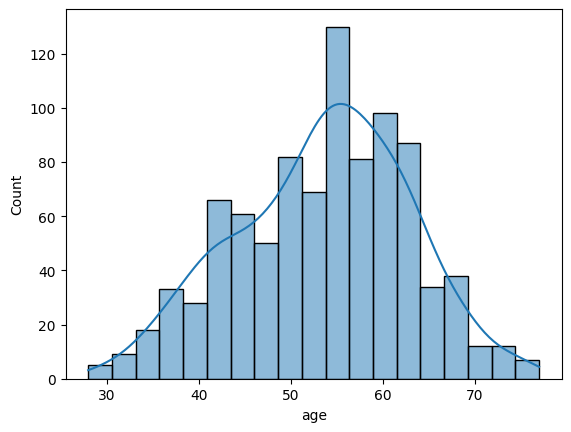

In [8]:
# draw a histogram to see the distribution of age column
sns.histplot(df['age'],kde=True)

Mean:  53.51086956521739
Median:  54.0
Mode:  54


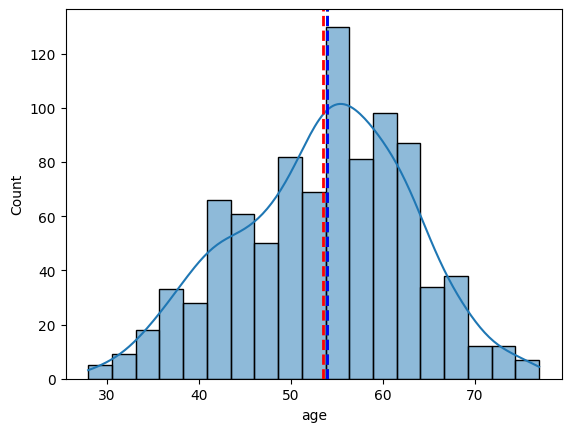

In [9]:
# plot the mean median mode of age column using sns
sns.histplot(df['age'],kde=True)
plt.axvline(df['age'].mean(),color='red',linestyle='dashed',linewidth=2)
plt.axvline(df['age'].median(),color='green',linestyle='dashed',linewidth=2)
plt.axvline(df['age'].mode()[0],color='blue',linestyle='dashed',linewidth=2)

#print mean median mode
print('Mean: ',df['age'].mean())
print('Median: ',df['age'].median())
print('Mode: ',df['age'].mode()[0])

#### Sex column


In [10]:
# plot the histogram of age column using plotly and coloring this by sex
fig = px.histogram(df, x="age", color="sex", title="Age Distribution by Gender")
fig.show()

In [11]:
# find the value of same column
df['sex'].value_counts()

,count
sex,
Male,726
Female,194


In [12]:
print('Male percentage', (726/920)*100)
print('Female percentage', (194/920)*100)

Male percentage 78.91304347826087
Female percentage 21.086956521739133


In [13]:
# find the value count by grouping by sex column
df.groupby('sex')['age'].value_counts() # will give [age] value_counts wrt (sex)
# can also read age column value counts groupby sex column

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

#### datset column

In [14]:
# lets deal with dataset column
df['dataset'].value_counts()

,count
dataset,
Cleveland,304
Hungary,293
VA Long Beach,200
Switzerland,123


sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

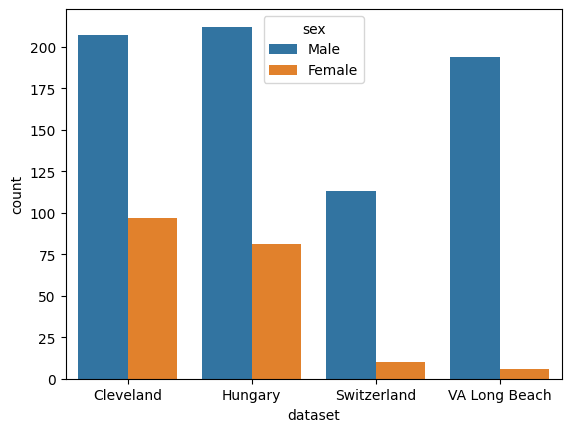

In [15]:
# we have to find how many male females from which dataset by ploting
sns.countplot(data=df, x='dataset', hue='sex')

fig =px.bar(df, x='dataset', color='sex')
fig.show()

df.groupby('sex')['dataset'].value_counts()# will give [dataset] value_counts wrt (sex)

In [16]:
# make a plot of age column using plotly and coloring by dataset
fig = px.histogram(df, x="age", color="dataset", title="Age Distribution by Dataset")
fig.show()

# print the mean median mode of age column grouped by dataset column
print('Mean: ',df.groupby('dataset')['age'].mean())# will give [age] mean wrt (dataset)
print('\nMedian: ',df.groupby('dataset')['age'].median())
print('\nMode: ',df.groupby('dataset')['age'].agg(pd.Series.mode))

Mean:  dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64

Median:  dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64

Mode:  dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object


#### Cp column

In [17]:
# CP(chest pain) column # angina mean pain
df['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


<Axes: xlabel='cp', ylabel='count'>

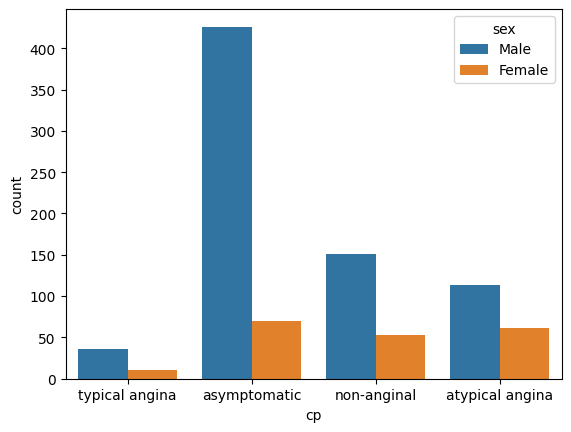

In [18]:
# count plot of cp column by sex column
sns.countplot(data=df, x='cp', hue='sex')

<Axes: xlabel='cp', ylabel='count'>

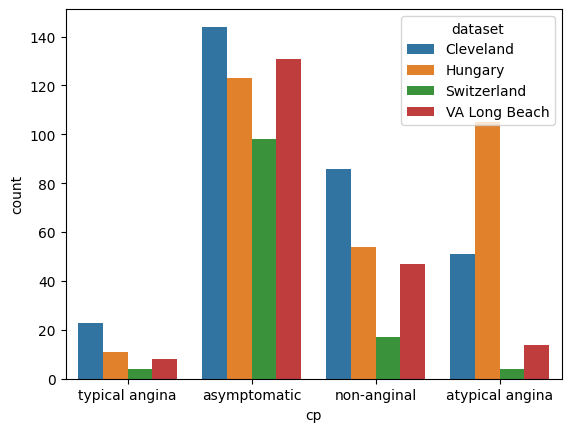

In [19]:
# count plot of cp column by dataset column
sns.countplot(data=df, x='cp', hue='dataset')

In [20]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(df, x="age", color="cp", title="Age Distribution by Chest Pain Type")
fig.show()

#### Trestbps column

In [21]:
# trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
# normal is 120/80 mm Hg
# it has missing values as well
df['trestbps'].describe()


,trestbps
count,861.000000
mean,132.132404
std,19.066070
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


<Axes: xlabel='trestbps', ylabel='Count'>

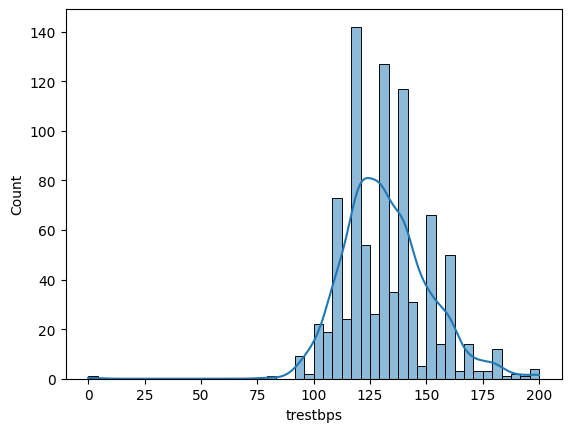

In [22]:
# create hist plot of trestbps column
sns.histplot(df['trestbps'],kde=True)

#### chol column

In [23]:
# chol (Cholesterol)
# Serum cholesterol level (mg/dL)
# Measured via blood test
# Higher values → Increased heart disease risk
# Math Note: Normally 125-200 mg/dL; 0 is impossible

# min max chol values
df['chol'].min(), df['chol'].max()

(0.0, 603.0)

<Axes: xlabel='chol', ylabel='Count'>

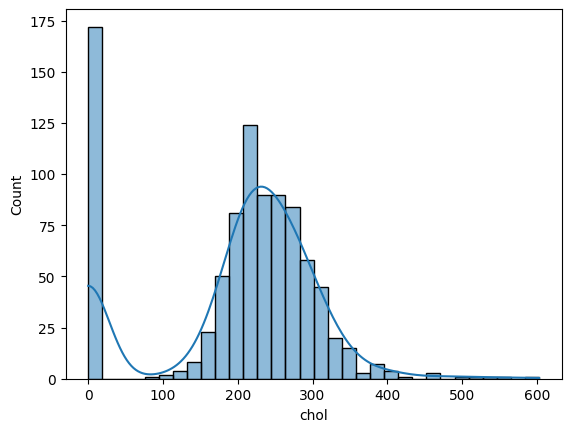

In [24]:
# draw histogram
sns.histplot(df['chol'],kde=True)

Mean:  199.13033707865168
Median:  223.0
Mode:  0.0


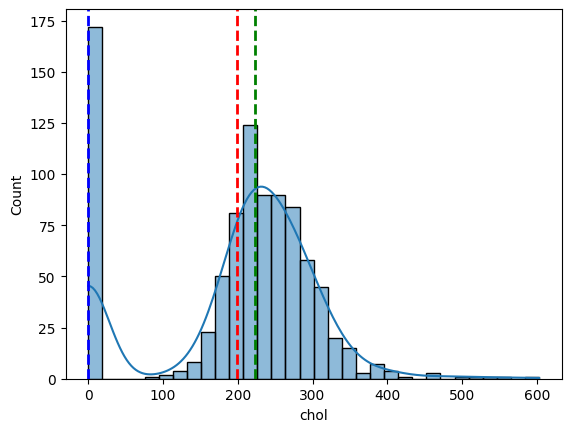

In [25]:
# plot mean median mode using sns and print results
sns.histplot(df['chol'],kde=True)
plt.axvline(df['chol'].mean(),color='red',linestyle='dashed',linewidth=2)
plt.axvline(df['chol'].median(),color='green',linestyle='dashed',linewidth=2)
plt.axvline(df['chol'].mode()[0],color='blue',linestyle='dashed',linewidth=2)

#print
print('Mean: ',df['chol'].mean())
print('Median: ',df['chol'].median())
print('Mode: ',df['chol'].mode()[0])


In [26]:
# find value count grouping by sex
df.groupby('sex')['chol'].value_counts()

sex     chol 
Female  0.0      11
        269.0     4
        294.0     4
        197.0     3
        201.0     3
                 ..
Male    466.0     1
        491.0     1
        518.0     1
        529.0     1
        603.0     1
Name: count, Length: 319, dtype: int64

In [27]:
# plot histogram of chol using plotly and coloring by sex
fig = px.histogram(df, x="chol", color="sex", title="Cholesterol Distribution by Gender")
fig.show()

In [28]:
# plot cholestrol level areas wise dataset column
fig = px.histogram(df, x="chol", color="dataset", title="Cholesterol Distribution by Dataset")
fig.show()


#### fbs column

In [29]:
# fbs (Fasting Blood Sugar)
# Binary: 1 if >120 mg/dL (diabetes risk)
# draw histogram of sex column using plotly and coloring by fbs
fig = px.histogram(df, x="sex", color="fbs", title="Fasting Blood Sugar Distribution by Gender")
fig.show()

In [30]:
# value count fbs wrt sex
df.groupby('sex')['fbs'].value_counts()

sex     fbs  
Female  False    164
        True      19
Male    False    528
        True     119
Name: count, dtype: int64

In [31]:
# plot histogram of dataset and coloring by fbs
fig = px.histogram(df, x="dataset", color="fbs", title="Fasting Blood Sugar Distribution by Dataset")
fig.show()

In [32]:
# plot histogram group by age
fig = px.histogram(df, x="age", color="fbs", title="Fasting Blood Sugar Distribution by Age")
fig.show()

In [33]:
# plot histogram group by cp
fig = px.histogram(df, x="cp", color="fbs", title="Fasting Blood Sugar Distribution by Chest Pain Type")
fig.show()

#### restecg column

In [34]:
# restecg (Resting ECG)
# 0 = Normal
# 1 = ST-T wave abnormality (electrical irregularity)
# 2 = Left ventricular hypertrophy (heart muscle thickening)

# draw histogram of restecg column using plotly and coloring by sex
fig = px.histogram(df, x="sex", color="restecg", title="Resting ECG Distribution by Gender")
fig.show()

In [35]:
# plot hist wrt age
fig = px.histogram(df, x="age", color="restecg", title="Resting ECG Distribution by Age")
fig.show()

In [36]:
# groupby dataset for restecg
df.groupby('dataset')['restecg'].value_counts()

dataset        restecg         
Cleveland      normal              151
               lv hypertrophy      149
               st-t abnormality      4
Hungary        normal              235
               st-t abnormality     52
               lv hypertrophy        5
Switzerland    normal               85
               st-t abnormality     30
               lv hypertrophy        7
VA Long Beach  st-t abnormality     93
               normal               80
               lv hypertrophy       27
Name: count, dtype: int64

#### thal column

In [37]:
# thal (Thallium Stress Test)
# Values:
# 3 = Normal blood flow
# 6 = Fixed defect (permanent damage)
# 7 = Reversible defect (temporary ischemia)

# value count
df['thal'].value_counts()

,count
thal,
normal,196
reversable defect,192
fixed defect,46


In [38]:
# histogram wrt to sex
fig = px.histogram(df, x="sex", color="thal", title="Thallium Stress Test Distribution by Gender")
fig.show()

# wrt to age
fig = px.histogram(df, x="age", color="thal", title="Thallium Stress Test Distribution by Age")
fig.show()

# wrt to dataset
fig = px.histogram(df, x="dataset", color="thal", title="Thallium Stress Test Distribution by Dataset")
fig.show()

# wrt cp
fig = px.histogram(df, x="cp", color="thal", title="Thallium Stress Test Distribution by Chest Pain Type")
fig.show()

# wrt chol
fig = px.histogram(df, x="chol", color="thal", title="Thallium Stress Test Distribution by Cholesterol")
fig.show()

#### thalch column

In [39]:
# thalch (Max Heart Rate)
# Highest achieved during exercise
# Inverse relationship with heart disease

#value counts
df['thalch'].value_counts()

,count
thalch,
150.0,43
140.0,41
120.0,35
130.0,30
160.0,26
...,...
63.0,1
67.0,1
107.0,1


In [40]:
# describe
df['thalch'].describe()

,thalch
count,865.000000
mean,137.545665
std,25.926276
min,60.000000
25%,120.000000
50%,140.000000
75%,157.000000
max,202.000000


Mean:  137.5456647398844
Median:  140.0
Mode:  150.0


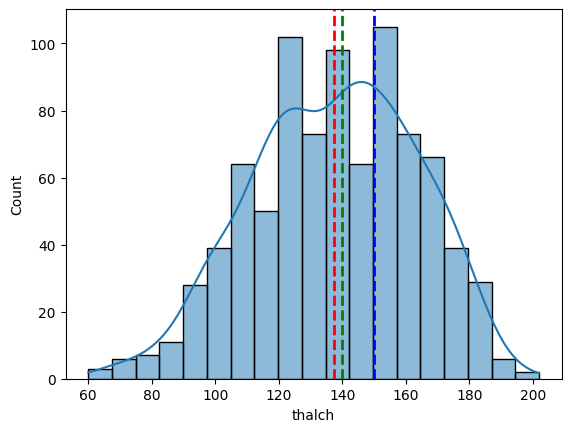

In [41]:
# plot histogram alongside mean median mode
sns.histplot(df['thalch'],kde=True)
plt.axvline(df['thalch'].mean(),color='red',linestyle='dashed',linewidth=2)
plt.axvline(df['thalch'].median(),color='green',linestyle='dashed',linewidth=2)
plt.axvline(df['thalch'].mode()[0],color='blue',linestyle='dashed',linewidth=2)

# print
print('Mean: ',df['thalch'].mean())
print('Median: ',df['thalch'].median())
print('Mode: ',df['thalch'].mode()[0])

#### exang column

In [42]:
# exang (Exercise-Induced Angina)
# Binary: 1 = chest pain during exercise

# value count
df['exang'].value_counts()

,count
exang,
False,528
True,337


In [43]:
# histogram wrt sex
fig = px.histogram(df, x="sex", color="exang", title="Exercise-Induced Angina Distribution by Gender")
fig.show()

# histogram wrt age
fig = px.histogram(df, x="age", color="exang", title="Exercise-Induced Angina Distribution by Age")
fig.show()

# hist wrt dataset
fig = px.histogram(df, x="dataset", color="exang", title="Exercise-Induced Angina Distribution by Dataset")
fig.show()

# hist wrt chol
fig = px.histogram(df, x="chol", color="exang", title="Exercise-Induced Angina Distribution by Cholesterol")
fig.show()

# hist wrt cp
fig = px.histogram(df, x="cp", color="exang", title="Exercise-Induced Angina Distribution by Chest Pain Type")
fig.show()

#### oldpeak column

In [44]:
# oldpeak (ST Depression)
# ECG measure of stress-induced ischemia
# Continuous value ≥0
# Higher = worse
# ST depression induced by exercise relative to rest

# max min value
df['oldpeak'].min(), df['oldpeak'].max()

(-2.6, 6.2)

In [45]:
# value count
df['oldpeak'].value_counts()

,count
oldpeak,
0.0,370
1.0,83
2.0,76
1.5,48
3.0,28
0.5,19
1.2,17
2.5,16
0.8,15


Mean:  0.8787878787878788
Median:  0.5
Mode:  0.0


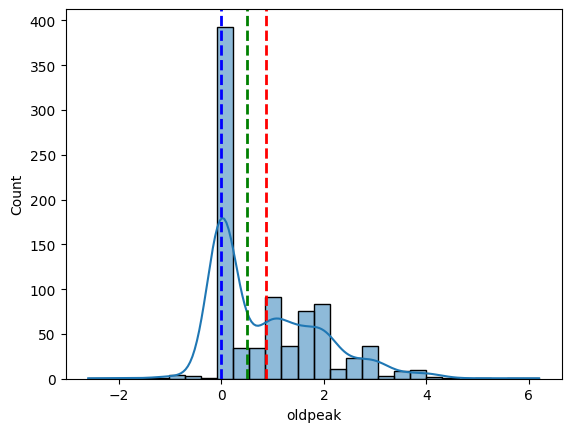

In [46]:
# plot histogram alongside mean median mode
sns.histplot(df['oldpeak'],kde=True)
plt.axvline(df['oldpeak'].mean(),color='red',linestyle='dashed',linewidth=2)
plt.axvline(df['oldpeak'].median(),color='green',linestyle='dashed',linewidth=2)
plt.axvline(df['oldpeak'].mode()[0],color='blue',linestyle='dashed',linewidth=2)

# print
print('Mean: ',df['oldpeak'].mean())
print('Median: ',df['oldpeak'].median())
print('Mode: ',df['oldpeak'].mode()[0])

#### slope column

In [47]:
# slope
# Slope of ST segment during peak exercise:
# 1 = Upsloping (better prognosis)
# 2 = Flat
# 3 = Downsloping (highest coronary risk)

#value count
df['slope'].value_counts()

,count
slope,
flat,345
upsloping,203
downsloping,63


In [48]:
# histogram wrt sex
fig = px.histogram(df, x="sex", color="slope", title="Slope Distribution by Gender")
fig.show()

# histogram wrt age
fig = px.histogram(df, x="age", color="slope", title="Slope Distribution by Age")
fig.show()

# hist wrt dataset
fig = px.histogram(df, x="dataset", color="slope", title="Slope Distribution by Dataset")
fig.show()

# hist wrt chol
fig = px.histogram(df, x="chol", color="slope", title="Slope Distribution by Cholesterol")
fig.show()

# hist wrt cp
fig = px.histogram(df, x="cp", color="slope", title="Slope Distribution by Chest Pain Type")
fig.show()

#### ca column

In [49]:
# ca
# Number of major coronary arteries with >50% blockage (seen via angiogram)
# 0-3 vessels (higher = worse disease)

# value count
df['ca'].value_counts()

,count
ca,
0.0,181
1.0,67
2.0,41
3.0,20


In [50]:
# histogram wrt sex
fig = px.histogram(df, x="sex", color="ca", title="ca Distribution by Gender")
fig.show()

# histogram wrt age
fig = px.histogram(df, x="age", color="ca", title="ca Distribution by Age")
fig.show()

# hist wrt dataset
fig = px.histogram(df, x="dataset", color="ca", title="ca Distribution by Dataset")
fig.show()

# hist wrt chol
fig = px.histogram(df, x="chol", color="ca", title="ca Distribution by Cholesterol")
fig.show()

# hist wrt cp
fig = px.histogram(df, x="cp", color="ca", title="ca Distribution by Chest Pain Type")
fig.show()

#### num column(predicted attribute/ouput)

In [51]:
# num (Target Variable)
# Diagnosis of heart disease:
# 0 = No disease
# 1-4 = Severity levels (higher = worse)
# Note: Often simplified to binary (0 vs. ≥1)

# value count
df['num'].value_counts()

,count
num,
0,411
1,265
2,109
3,107
4,28


In [52]:
import plotly.express as px

columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
           'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'dataset']

for col in columns:
    fig = px.histogram(df, x=col, color="num", title=f"num Distribution by {col}")
    fig.show()

### Missing Values Imputation Function using ML(Random Forest)

In [53]:
df.isnull().sum()[df.isnull().sum() > 0]

,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55
exang,55
oldpeak,62
slope,309
ca,611
thal,486


In [54]:
# Calculate percentage of missing values in entire DataFrame
total_cells = df.size  # Total cells in DataFrame
missing_cells = df.isnull().sum().sum()  # Total missing values
missing_percentage = (missing_cells / total_cells) * 100

print(f"Missing values: {missing_percentage:.2f}%")

Missing values: 11.95%


In [55]:
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [56]:
# find only categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
# find only numerical columns
num_cols = df.select_dtypes(exclude='object').columns.tolist()

print(f'Categorical Columns: {cat_cols}')
print(f'Numerical Columns: {num_cols}')

Categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numerical Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [58]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [59]:
# define the function to impute the missing values in thal column
# Approach:
# Identifying which columns have missing values
# Separating categorical vs. numerical data
# Using machine learning models to intelligently predict missing values
# Combining everything back into a complete dataset

def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]
    # Splits data into:
    # Rows where the column has missing values (df_null)
    # Rows where the column has values (df_not_null)

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    # Prepares data for machine learning:
    # X = all columns except the one we're filling
    # y = just the column we're filling

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    # Equivalent code:
    #     other_missing_cols = []  # Start with an empty list
    # for col in missing_data_cols:  # Loop through each column in missing_data_cols
    #     if col != passed_col:  # If the column is not the one we're currently working on
    #         other_missing_cols.append(col)  # Add it to our new list

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    # Converts all categorical columns in X to numerical values

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
    # If our column is boolean (true/false), convert it to 0/1

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)
    # Creates an advanced missing value imputer using Random Forests

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            # X[col].values gets the actual data values from the column
            # .reshape(-1, 1) reshapes the data into a vertical format (many rows, 1 column) which is what the imputer expects
            # Example: Turns [1, 2, None, 4] into [[1], [2], [None], [4]]
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
            # [:, 0] selects all rows from the first (and only) column
            # We assign these back to the original column X[col]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass
    # Uses the trained model to predict missing values
    # Converts boolean columns back to True/False if needed

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    # The impute_continuous_missing_data function is very similar but:
    # Uses a Random Forest Regressor instead of Classifier
    # Uses regression metrics (MAE, RMSE, R2) instead of accuracy
    # Doesn't need boolean conversion

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [60]:
# Why we need to handle `other_missing_cols` separately from the initial `missing_data_cols`.

# ## The Key Difference:

# 1. **`missing_data_cols`**
#    - Contains ALL columns in your dataset that have any missing values
#    - Example: `['age', 'thal', 'chol', 'ca']`

# 2. **`other_missing_cols`**
#    - Contains only the missing columns *except* the current one we're focusing on (`passed_col`)
#    - If `passed_col = 'thal'`, then `other_missing_cols = ['age', 'chol', 'ca']`

# ## Why Both Are Needed:

# ### 1. The Problem We're Solving:
# When you want to predict missing values in one column (let's say `'thal'`), you need to use the other columns as predictors. But what if those other columns *also* have missing values? The model can't work with incomplete predictor data.

# ### 2. The Solution Approach:
# 1. First pass: Identify all columns with missing data (`missing_data_cols`)
# 2. When fixing one column (e.g., `'thal'`):
#    - We need to temporarily fill missing values in *other* columns (`other_missing_cols`) first
#    - Then use those complete columns to predict missing values in our target column (`'thal'`)

# ### 3. Practical Example:
# Imagine trying to predict missing ages (`age`) in a dataset:
# - You'd want to use columns like `weight` and `height` as predictors
# - But if `weight` also has missing values, you'd need to fill those first
# - That's what this code does - it creates a clean set of predictors before predicting your target column

# ## The Complete Logic Flow:
# ```python
# # For each column with missing data (e.g., 'thal'):
# for col in missing_data_cols:

#     # First find which OTHER columns need temporary fixing
#     other_missing_cols = [c for c in missing_data_cols if c != col]

#     # Temporarily fill those other columns
#     for other_col in other_missing_cols:
#         if data[other_col] has missing values:
#             fill them with simple imputation

#     # Now that all OTHER columns are complete,
#     # we can properly predict missing values in our target column
#     predict_missing_values_in(col)
# ```

# ## Why Not Fix All Columns First?
# You might ask - why not just fill all missing columns at once? Because:

# 1. **Order Matters**: Some columns are easier to predict (like numerical ones) and should be done first
# 2. **Dependencies**: You might want to use already-filled columns to help predict others
# 3. **Precision**: This approach gives more accurate results than filling all columns the same way

# ## Key Takeaway:
# We need `other_missing_cols` because when predicting missing values in one column, we need to ensure all the other columns we're using as predictors don't have missing values themselves. It's like solving a puzzle - you need some complete pieces before you can figure out where the missing pieces go.

In [61]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

,0
ca,611
thal,486
slope,309
fbs,90
oldpeak,62
trestbps,59
exang,55
thalch,55
chol,30
restecg,2


In [62]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

    # For each column with missing values:
    # Prints what percentage is missing
    # Uses the appropriate function to fill them

Missing Values trestbps : 6.41%
MAE = 13.107398843930635 

RMSE = 292.0960312138728 

R2 = 0.08798190868032663 

Missing Values chol : 3.26%
MAE = 45.9782584269663 

RMSE = 4187.887825280899 

R2 = 0.6682478960098501 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 64.67 accuracy

Missing Values thalch : 5.98%
MAE = 17.000693641618497 

RMSE = 480.14418728323704 

R2 = 0.30183031240857017 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.19 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5673372093023256 

RMSE = 0.6432332209302325 

R2 = 0.38718919796590767 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 68.29 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 64.52 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 74.71 accuracy



In [63]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


### Handling Outliers in dataset

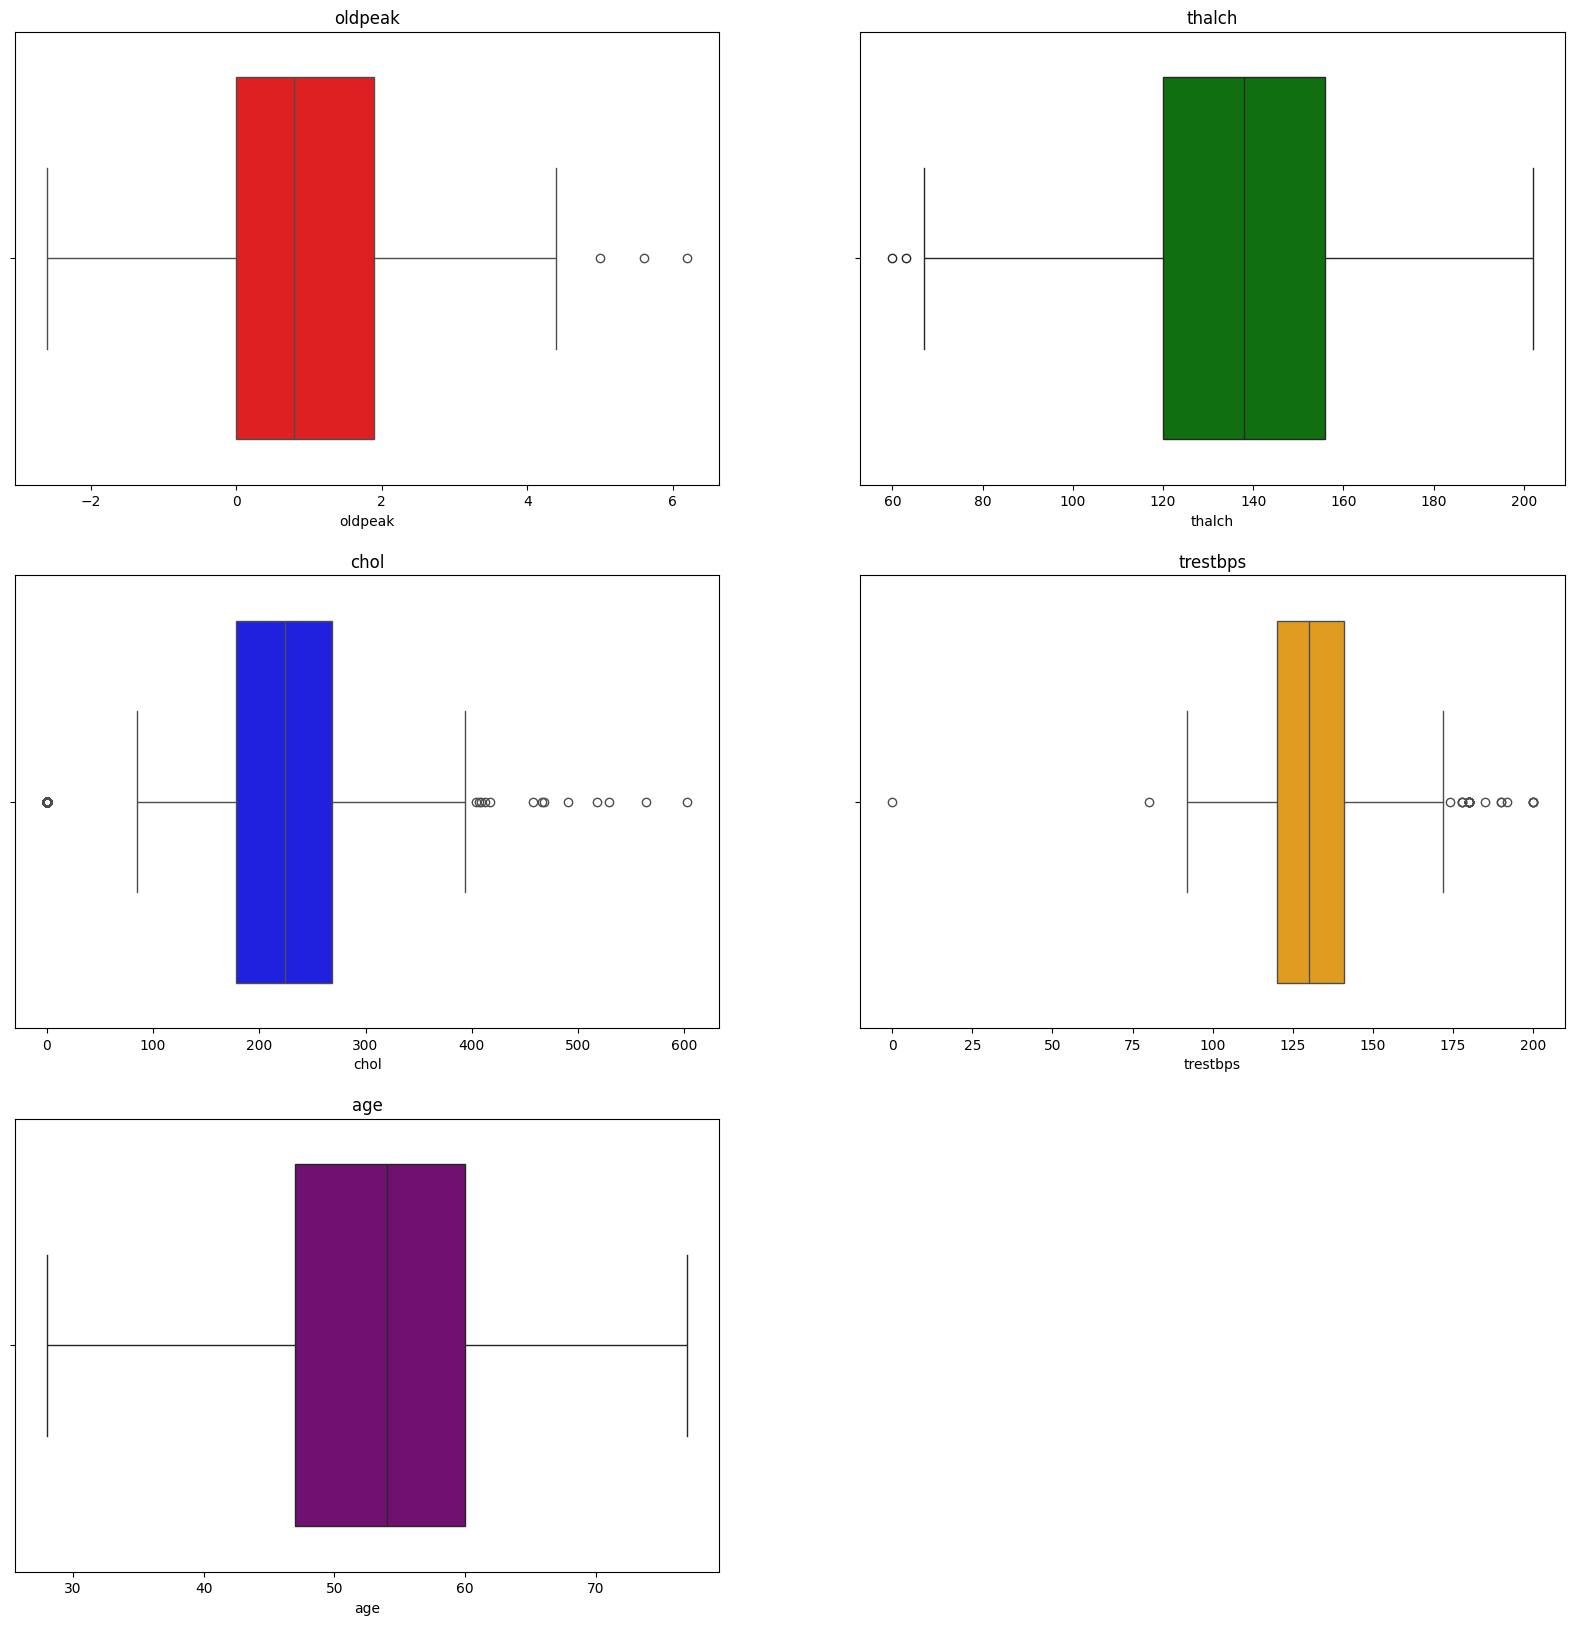

In [64]:
# create boxplots for all numeric columns using for loop and subplot
plt.figure(figsize=(20,20))
colors = ['red','green','blue','orange','purple']
for i,col in enumerate(numeric_cols):
    plt.subplot(3,2,i+1)#3 rows and 2 columns
    sns.boxplot(x=df[col],color=colors[i])
    plt.title(col)
plt.show()

# Consideration from boxplot: Are all values actually outliers? means that there can be some values that are actually high eg cholestrol of a person is actually high/low(looks like outlier but it is not)
# to detect these outliers is domain specific


In [65]:
import plotly.express as px
fig = px.box(df, y=numeric_cols, color_discrete_sequence=['red','green','blue','orange','purple'])
fig.update_layout(title_text='Boxplot of Numeric Columns', title_x=0.5)
fig.show()

In [66]:
# Obvious outliers will be removed

# print the row from df where trestbps val is 0
df[df['trestbps'] == 0]

# remove this row
df = df[df['trestbps'] != 0]

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        919 non-null    int64  
 1   age       919 non-null    int64  
 2   sex       919 non-null    object 
 3   dataset   919 non-null    object 
 4   cp        919 non-null    object 
 5   trestbps  919 non-null    float64
 6   chol      919 non-null    float64
 7   fbs       919 non-null    object 
 8   restecg   919 non-null    object 
 9   thalch    919 non-null    float64
 10  exang     919 non-null    object 
 11  oldpeak   919 non-null    float64
 12  slope     919 non-null    object 
 13  ca        919 non-null    float64
 14  thal      919 non-null    object 
 15  num       919 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 122.1+ KB


In [68]:
# print the row from df where cholval is 0
df[df['chol'] == 0]
# 171 rows

# remove chol 0 rows 171 rows no way instead I will prefer knn imputer because I want to preserve info of other features
df = df[df['chol'] != 0]

# show chol=0 group by num
df[df['chol'] == 0].groupby('num').size()

,0
num,


In [69]:
 df[df['chol'] == 0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num


In [70]:
# df.info()

### Standardization and Normalization

In [71]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [72]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Features to standardize
std_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df[std_features] = StandardScaler().fit_transform(df[std_features])

# Features to normalize
norm_features = ['ca', 'exang']
df[norm_features] = MinMaxScaler().fit_transform(df[norm_features])

df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0


In [73]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,1.066029,Male,Cleveland,typical angina,0.684747,-0.237420,True,lv hypertrophy,0.401527,0.0,1.163887,downsloping,0.000000,fixed defect,0
1,2,1.487538,Male,Cleveland,asymptomatic,1.550012,0.681326,False,lv hypertrophy,-1.318536,1.0,0.454464,flat,1.000000,normal,2
2,3,1.487538,Male,Cleveland,asymptomatic,-0.757360,-0.306759,False,lv hypertrophy,-0.458504,1.0,1.429920,flat,0.666667,reversable defect,1
3,4,-1.673780,Male,Cleveland,non-anginal,-0.180517,0.057272,False,normal,1.916821,0.0,2.228022,downsloping,0.000000,normal,0
4,5,-1.252271,Female,Cleveland,atypical angina,-0.180517,-0.740130,False,lv hypertrophy,1.302512,0.0,0.365786,upsloping,0.000000,normal,0


## Machine Learning

### X & Y

In [74]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [75]:
# num value count
df['num'].value_counts()

,count
num,
0,391
1,203
3,69
2,63
4,22


In [76]:
# The target column is num 0,1,2,3,4 levels where 0 is no disease and 4 is extreme condition
# split the data into X and y
# drop num and id for X
X = df.drop(['num', 'id'], axis=1)
y = df['num']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass



### Handling Imbalance data

In [77]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import numpy as np

def safe_smote(X, y, target='median', k_neighbors=3, random_state=42):
    """
    Auto-protected SMOTE that never reduces original class sizes.

    Parameters:
    - target: 'median', 'auto', or float (e.g., 0.8 for 80% of majority)
    - k_neighbors: Auto-adjusted for small classes
    """
    counts = Counter(y)
    n_classes = len(counts)

    # Calculate safe target sizes
    if target == 'median':
        target_size = int(np.median(list(counts.values())))
    elif isinstance(target, float):  # e.g., target=0.8
        target_size = int(max(counts.values()) * target)
    else:  # 'auto' mode
        target_size = int(np.mean(list(counts.values())) * 1.5)

    # Never reduce existing classes
    sampling_strategy = {
        cls: max(count, target_size)
        for cls, count in counts.items()
    }

    # Adjust k_neighbors for smallest class
    min_samples = min(counts.values())
    effective_k = min(k_neighbors, min_samples - 1)

    sm = SMOTE(
        sampling_strategy=sampling_strategy,
        k_neighbors=effective_k,
        random_state=random_state
    )

    X_res, y_res = sm.fit_resample(X, y)
    print(f"Class counts after SMOTE: {Counter(y_res)}")
    return X_res, y_res

In [78]:
X, y= safe_smote(X, y, target=0.8)

Class counts after SMOTE: Counter({0: 391, 2: 312, 1: 312, 3: 312, 4: 312})


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 748 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        748 non-null    int64  
 1   age       748 non-null    float64
 2   sex       748 non-null    object 
 3   dataset   748 non-null    object 
 4   cp        748 non-null    object 
 5   trestbps  748 non-null    float64
 6   chol      748 non-null    float64
 7   fbs       748 non-null    object 
 8   restecg   748 non-null    object 
 9   thalch    748 non-null    float64
 10  exang     748 non-null    float64
 11  oldpeak   748 non-null    float64
 12  slope     748 non-null    object 
 13  ca        748 non-null    float64
 14  thal      748 non-null    object 
 15  num       748 non-null    int64  
dtypes: float64(7), int64(2), object(7)
memory usage: 99.3+ KB


### KNN Imputation

In [80]:
# import numpy as np
# from sklearn.impute import KNNImputer
# from sklearn.preprocessing import RobustScaler

# # 1. Identify which columns are numeric vs already encoded categorical
# numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# categorical_cols = list(set(X.columns) - set(numeric_cols))  # Already encoded columns

# # 2. For cholesterol only: replace 0 with NaN (biologically impossible)
# X['chol'] = X['chol'].replace(0, np.nan)

# # 3. Scale ONLY numeric features (excluding encoded categoricals)
# scaler = RobustScaler()
# X_scaled = X.copy()  # Preserve original dataframe structure
# X_scaled[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# # 4. KNN Imputation (only affects numeric columns with NaNs)
# imputer = KNNImputer(n_neighbors=5)
# X_imputed = imputer.fit_transform(X_scaled)

# # 5. Reconstruct DataFrame with correct column names/types
# X = pd.DataFrame(X_imputed, columns=X.columns)
# X[numeric_cols] = scaler.inverse_transform(X[numeric_cols])  # Undo scaling
# X[categorical_cols] = X[categorical_cols].round().astype(int)  # Fix encoded categories


In [81]:
# df[df['chol'] == 0]

In [82]:
# df.info()

### Splitting

In [83]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
# Enlist all the models that you will use to predict the heart disease. These models should be classifiers for multi-class classification.

# logistic regression
# KNN
# NB
# SVM
# Decision Tree
# Random Forest
# XGBoost
# GradientBoosting
# AdaBoost
# lightGBM

### Feature Selection

In [85]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

def select_features(
    X_train,
    y_train,
    method='rf',
    k=10,
    random_state=42
):
    """
    Generic feature selection function.

    Parameters:
    -----------
    X_train : pd.DataFrame or np.array
        Training feature matrix.
    y_train : pd.Series or np.array
        Target variable.
    method : str (default: 'rf')
        Feature selection method:
        - 'rf' : Random Forest importance
        - 'xgb' : XGBoost importance
        - 'chi2' : Chi-squared test
        - 'mutual_info' : Mutual Information
        - 'rfe' : Recursive Feature Elimination (RFE)
    k : int (default: 10)
        Number of top features to select.
    random_state : int (default: 42)
        Random seed for reproducibility.

    Returns:
    --------
    selected_features : list
        Names/indices of top `k` features.
    """

    if isinstance(X_train, pd.DataFrame):
        feature_names = X_train.columns
    else:
        feature_names = np.arange(X_train.shape[1])

    # Random Forest Importance
    if method == 'rf':
        model = RandomForestClassifier(random_state=random_state)
        model.fit(X_train, y_train)
        importances = model.feature_importances_

    # XGBoost Importance
    elif method == 'xgb':
        model = XGBClassifier(random_state=random_state)
        model.fit(X_train, y_train)
        importances = model.feature_importances_

    # Chi-Squared Test
    elif method == 'chi2':
        selector = SelectKBest(chi2, k=k)
        selector.fit(X_train, y_train)
        return feature_names[selector.get_support()]

    # Mutual Information
    elif method == 'mutual_info':
        selector = SelectKBest(mutual_info_classif, k=k)
        selector.fit(X_train, y_train)
        return feature_names[selector.get_support()]

    # Recursive Feature Elimination (RFE)
    elif method == 'rfe':
        model = RandomForestClassifier(random_state=random_state)
        selector = RFE(model, n_features_to_select=k)
        selector.fit(X_train, y_train)
        return feature_names[selector.support_]

    else:
        raise ValueError(f"Unknown method: {method}. Use 'rf', 'xgb', 'chi2', 'mutual_info', or 'rfe'.")

    # For importance-based methods (RF/XGB), return top K features
    indices = np.argsort(importances)[-k:]
    selected_features = feature_names[indices]

    return selected_features

In [86]:
selected_features = select_features(X_train, y_train, method='rf', k=14)
print("Selected Features:", selected_features)

Selected Features: Index(['fbs', 'sex', 'restecg', 'dataset', 'cp', 'thal', 'exang', 'slope',
       'trestbps', 'chol', 'thalch', 'age', 'oldpeak', 'ca'],
      dtype='object')


In [87]:
# Keep only selected features (drop the rest)
X_train = X_train[selected_features]  # Training set
X_test = X_test[selected_features]    # Test set


### Applying Model

In [88]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# from lightgbm import LGBMClassifier

# impot pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the performance metrics
    print("Model:", name)
    print(f"Cross-validation Accuracy: {mean_accuracy*100:.2f}%")
    print(f"Test Accuracy: {accuracy*100:.2f}%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

Model: Random Forest
Cross-validation Accuracy: 86.40%
Test Accuracy: 87.80%

Model: Gradient Boosting
Cross-validation Accuracy: 80.91%
Test Accuracy: 82.93%

Model: Support Vector Machine
Cross-validation Accuracy: 76.98%
Test Accuracy: 77.64%

Model: Logistic Regression
Cross-validation Accuracy: 59.90%
Test Accuracy: 59.76%

Model: K-Nearest Neighbors
Cross-validation Accuracy: 80.12%
Test Accuracy: 80.49%

Model: Decision Tree
Cross-validation Accuracy: 73.32%
Test Accuracy: 76.63%

Model: Ada Boost
Cross-validation Accuracy: 55.28%
Test Accuracy: 53.66%

Model: XG Boost
Cross-validation Accuracy: 83.44%
Test Accuracy: 88.41%

Model: Naive Bayes
Cross-validation Accuracy: 58.07%
Test Accuracy: 57.93%

Best Model: Pipeline(steps=[('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                       

In [91]:
# Save the model
import pickle # Import the pickle module
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### HyperParameter Tuning

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.naive_bayes import GaussianNB
# from xgboost import XGBClassifier
# from sklearn.base import BaseEstimator, TransformerMixin

# # Load your dataset
# # df = pd.read_csv('your_data.csv')
# # X = df.drop('target', axis=1)
# # y = df['target']
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Custom transformer to keep important features
# class ImportantFeatureKeeper(BaseEstimator, TransformerMixin):
#     def __init__(self, important_features=None, k=10):
#         self.important_features = important_features or []
#         self.k = k
#         self.selected_features_ = None

#     def fit(self, X, y=None):
#         if isinstance(X, pd.DataFrame):
#             # Get indices of important features
#             important_indices = [i for i, col in enumerate(X.columns)
#                               if col in self.important_features]
#             # Select top k features (including important ones)
#             selector = SelectKBest(f_classif, k=self.k)
#             selector.fit(X, y)
#             all_indices = np.argsort(selector.scores_)[-self.k:]
#             # Combine important features with top features
#             self.selected_features_ = list(set(important_indices + all_indices.tolist()))
#         return self

#     def transform(self, X):
#         if isinstance(X, pd.DataFrame):
#             return X.iloc[:, self.selected_features_]
#         return X[:, self.selected_features_]

# # Assuming your dataset has these columns - adjust as needed
# important_features = ['blood_pressure', 'cholesterol']

# # Create a list of models to evaluate with simplified parameter grids
# models = [
#     {
#         'name': 'Random Forest',
#         'model': RandomForestClassifier(random_state=42),
#         'params': {
#             'feature_keeper__k': [5, 10, 'all'],
#             'model__n_estimators': [100, 200],
#             'model__max_depth': [None, 10]
#         }
#     },
#     {
#         'name': 'Gradient Boosting',
#         'model': GradientBoostingClassifier(random_state=42),
#         'params': {
#             'feature_keeper__k': [5, 10, 'all'],
#             'model__n_estimators': [100],
#             'model__learning_rate': [0.1]
#         }
#     },
#     {
#         'name': 'Support Vector Machine',
#         'model': SVC(random_state=42),
#         'params': {
#             'feature_keeper__k': [5, 10, 'all'],
#             'model__C': [0.1, 1],
#             'model__kernel': ['linear', 'rbf']
#         }
#     },
#     {
#         'name': 'Logistic Regression',
#         'model': LogisticRegression(random_state=42, max_iter=1000),
#         'params': {
#             'feature_keeper__k': [5, 10, 'all'],
#             'model__C': [0.1, 1],
#             'model__penalty': ['l2']
#         }
#     },
#     {
#         'name': 'XG Boost',
#         'model': XGBClassifier(random_state=42),
#         'params': {
#             'feature_keeper__k': [5, 10, 'all'],
#             'model__n_estimators': [100],
#             'model__learning_rate': [0.1]
#         }
#     }
# ]

# best_model = None
# best_accuracy = 0.0
# best_model_name = ""

# # Iterate over the models and evaluate their performance
# for model_info in models:
#     name = model_info['name']
#     model = model_info['model']
#     params = model_info['params']

#     print(f"\n{'='*50}")
#     print(f"Evaluating and tuning {name}")
#     print(f"{'='*50}")

#     # Create a pipeline
#     pipeline = Pipeline([
#         ('feature_keeper', ImportantFeatureKeeper(important_features)),
#         ('scaler', StandardScaler()),
#         ('model', model)
#     ])

#     # Perform GridSearchCV
#     grid_search = GridSearchCV(pipeline, params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
#     grid_search.fit(X_train, y_train)

#     # Get the best estimator
#     best_pipeline = grid_search.best_estimator_

#     # Make predictions on the test data
#     y_pred = best_pipeline.predict(X_test)

#     # Calculate accuracy score
#     accuracy = accuracy_score(y_test, y_pred)

#     # Print the performance metrics
#     print(f"\nBest parameters for {name}:")
#     print(grid_search.best_params_)
#     print("\nClassification Report:")
#     print(classification_report(y_test, y_pred))
#     print(f"Test Accuracy: {accuracy:.4f}")

#     # Check if the current model has the best accuracy
#     if accuracy > best_accuracy:
#         best_accuracy = accuracy
#         best_model = best_pipeline
#         best_model_name = name

# # Retrieve the best model
# print("\n" + "="*50)
# print(f"Best Model: {best_model_name} with accuracy: {best_accuracy:.4f}")
# print("Best Model Pipeline:", best_model)
# print("="*50)

In [ ]:
# # First, let's diagnose the data
# print("Class distribution:")
# print(y.value_counts(normalize=True))

# print("\nMissing values:")
# print(X.isnull().sum())

# # Remove the forced feature inclusion and try different approaches
# models = [
#     {
#         'name': 'Random Forest',
#         'model': RandomForestClassifier(random_state=42),
#         'params': {
#             'selector__k': [5, 10, 15, 'all'],  # More feature options
#             'model__n_estimators': [100, 200, 300],
#             'model__max_depth': [None, 5, 10, 20],
#             'model__class_weight': ['balanced', None]
#         }
#     },
#     {
#         'name': 'XGBoost',
#         'model': XGBClassifier(random_state=42, eval_metric='logloss'),
#         'params': {
#             'selector__k': [5, 10, 15, 'all'],
#             'model__n_estimators': [100, 200],
#             'model__learning_rate': [0.01, 0.1],
#             'model__max_depth': [3, 6, 9],
#             'model__scale_pos_weight': [1, sum(y==0)/sum(y==1)]  # Handle imbalance
#         }
#     }
# ]

# # Simplified pipeline without forced features
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('selector', SelectKBest(f_classif)),
#     ('model', None)
# ])

# best_accuracy = 0
# for model_info in models:
#     print(f"\n{'='*50}")
#     print(f"Tuning {model_info['name']}")

#     # Update pipeline with current model
#     pipeline.set_params(model=model_info['model'])

#     # More thorough search
#     search = GridSearchCV(pipeline, model_info['params'],
#                          cv=5, scoring='accuracy',
#                          n_jobs=-1, verbose=2)
#     search.fit(X_train, y_train)

#     # Evaluate
#     y_pred = search.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     print(f"Best {model_info['name']} accuracy: {acc:.4f}")
#     print(classification_report(y_test, y_pred))

#     if acc > best_accuracy:
#         best_model = search.best_estimator_
#         best_accuracy = acc

# # Feature importance analysis
# if hasattr(best_model.named_steps['model'], 'feature_importances_'):
#     importances = best_model.named_steps['model'].feature_importances_
#     features = X.columns[best_model.named_steps['selector'].get_support()]
#     print("\nTop Features:")
#     for feat, imp in sorted(zip(features, importances), key=lambda x: x[1], reverse=True)[:10]:
#         print(f"{feat}: {imp:.4f}")

## Outputs:

   1. The minimum age to have heart disease starts from 28 years old.
   2. Most of the people get heart disease at the age of 53-54 years.
   3. Most of the males and females get heart disease at 53-54 years
   4. Male percentage to get heart disease in my data is 78.91
   5. Female percentage to get heart disease in my data is 21.08
   6. We have patients in this order from places Cleveland(304)>Hungary(293)>VA Long Beach(200)>witzerland(123)
      1. The highest numbers of females in this dataset are from Cleveland(97) and lowest from VA(6)  
      2. The highest numbers of males in this dataset are from Hungary(212) and lowest from Switzerland(113)  
   8. Observation from Dataset column:
      1. VA has highest Mean, Median, Mode while lowest Mean, Median, Mode  is from Hungary based on age column grouped by dataset
   9. Observation from Cp column:
      1. People getting cancer from asymptomatic type at highest while lowest from angina type.
      2. In the given dataset, the percentage difference between male female ratio in asymptomatic type is very high
   10. Observations for Missing values:
      1. Percentage of missing values in entire DataFrame is 11.95%
      2. Total of 10 columns out of 16 has missing values.
      3. These are the missings values number(column wise)in my dataset and their datatype ca(categorical)	611, thal(categorical)	486, slope(categorical)	309, fbs(categorical)	90, oldpeak(numerical)	62, trestbps(numerical)	59, exang(bool)	55, thalch(numerical)	55, chol(numerical)	30, restecg(categorical)	2. Highest in ca and lowest in restecg
   11. Observations for outliers:
      1. These numerical columns: trestbps, chol, thalch, oldpeak, ca has outliers
      2. 171 values of chol(cholestrol) has 0 value that is impossible for humans. So those columns are removed/imputed using KNNimputer.
      3. Outliers from other columns are negligible, so remain as it is.
   12. Observations for Standardization and Normalization:
      1. Numerical columns such as age, trestbps, chol, thalch, oldpeak has been standardized using standard scalar.
      2. Numerical columns such as ca, exang has been normalized
   13. Obeservations for Handling Imbalanced data:
      1. Count of num is as follows:Counter({0: 391, 1: 203, 2: 63, 3: 63, 4: 22}). So it is balanced using SMOTE over sampling in such way that Counter({0: 391, 2: 312, 1: 312, 3: 312, 4: 312})
   14. Feature Selection improves accuracy by 2%
   15. HyperParameter Tuning improves accuracy by 1.2%
   16. Observations from Model Selection:
      1. 10 Models have been used i.e
          1. Logistic regression
          2. KNN
          3. NB
          4. SVM
          5. Decision Tree
          6. Random Forest
          7. XGBoost
          8. GradientBoosting
          9. AdaBoost
          10. LightGBM
      2. In given dataset, Random Forest performs best having accuracy of 85.88%, and test accuracy of 87.22% for heart disease prediction.



